<a href="https://colab.research.google.com/github/sdsc-bw/DataFactory/blob/develop/model_selection/Demo_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Selection in Time Series

In this notebook we want to introduce Time Series (TS) and some state-of-the-art architectures. A time series is a series/list of data points in time order. A simple example is be the temperature measurement over one day.

<img src="../images/ts.png"/>

Time series in AI can be divided in 2 tasks:
- Classification: asign the series to one class (sometimes multiple)
- Regression/Forecasting: use time series to predict future values

There are a variety of state-of-the-art architectures to solve these tasks. In this repo we provide a simple interface to train common architectures (and later to finetune them). In order to do that we use the library [tsai](https://github.com/timeseriesAI/tsai) which provides state-of-the-art techniques for time series.

In [1]:
! git clone https://github.com/sdsc-bw/DataFactory.git
! ls

fatal: destination path 'DataFactory' already exists and is not an empty directory.
Der Befehl "ls" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [2]:
!pip install tsai

## Import packages

In [3]:
root = '../'

In [4]:
from tsai.all import *

from util import compare_networks

sys.path.insert(0, root + "codes")

from DataFactory import DataFactory

C:\Users\Nisch\anaconda3\envs\datafactory\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Nisch\anaconda3\envs\datafactory\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Nisch\anaconda3\envs\datafactory\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


os             : Windows-10-10.0.19041-SP0
python         : 3.8.12
tsai           : 0.2.23
fastai         : 2.5.3
fastcore       : 1.3.27
torch          : 1.9.1+cpu
n_cpus         : 8
device         : cpu
os             : Windows-10-10.0.19041-SP0
python         : 3.8.12
tsai           : 0.2.23
fastai         : 2.5.3
fastcore       : 1.3.27
torch          : 1.9.1+cpu
n_cpus         : 8
device         : cpu


In [5]:
datafactory = DataFactory()

## NATOPS Dataset

The [NATOPS dataset](https://github.com/yalesong/natops) is used for gesture recognition of aircraft handling signals. It contains the x, y, z coordination for 8 body parts:
- Hand tip left
- Hand tip right
- Elbow left
- Elbow right
- Wrist left
- Wrist right

It is a multivariate dataset, so a sample can be asigned to multiple classes.

## OliveOil Dataset

The [OliveOil dataset](https://www2.chemie.uni-erlangen.de/publications/ANN-book/datasets/oliveoil/index.html) contains olive oil samples from nine regions of Italy. Each sample has eight attributes which are different fatty acidy with normalized concentrations. 

## LSST Dataset

The [LSST dataset](https://www.kaggle.com/c/PLAsTiCC-2018) contains astronomical data of time-varying obects. The time series are the measurements of the brightness (with different passbands) of an object over time which are used to classify the objects. 

## Models

In this section we want to briefly propose some of the state-of-the-art methods.

### ResNet

ResNet is proposed from Wang et al in 2016 ([paper](https://arxiv.org/abs/1611.06455)). It consists of three residual blocks. Each block consits of three convolutional layers each followed by batch normalization and a ReLU function. Also there is a shortcut in every residual block. At the end is a global average pooling layer and a softmax layer.

<img src="../images/res_net.png"/>

### IncetptionTime

InceptionTime is propsed form Fawaz et al. in 2019 ([paper](https://arxiv.org/abs/1909.04939)). Compared to ResNet, InceptionTime has three inception blocks instead of convolutional layer.

<img src="../images/inception_time.png"/>

## Comparison of the Models

2021-12-03 17:06:07,221 - DataFactory - INFO - Start network training of: lstm...


epoch,train_loss,valid_loss,accuracy,time
0,1.797830,1.794012,0.155556,00:01
1,1.795182,1.793468,0.155556,00:00
2,1.796021,1.792307,0.166667,00:00
3,1.794789,1.790628,0.166667,00:00
4,1.794640,1.788168,0.172222,00:00
5,1.792324,1.784834,0.188889,00:00
6,1.791325,1.781008,0.205556,00:00
7,1.788993,1.776154,0.222222,00:00
8,1.786878,1.769851,0.227778,00:00
9,1.784451,1.761588,0.238889,00:00


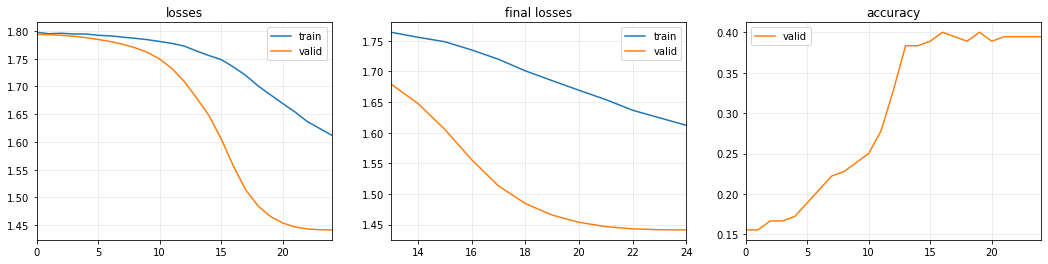

2021-12-03 17:06:26,021 - DataFactory - INFO - ...End network training
2021-12-03 17:06:26,022 - DataFactory - INFO - Start network training of: res_net...


epoch,train_loss,valid_loss,accuracy,time
0,1.743162,1.801595,0.138889,00:00
1,1.705430,1.774116,0.166667,00:00
2,1.604014,1.730846,0.205556,00:00
3,1.467454,1.643095,0.561111,00:00
4,1.329135,1.474952,0.816667,00:00
5,1.203789,1.242519,0.844444,00:00
6,1.090183,0.983712,0.877778,00:00
7,0.986813,0.762181,0.877778,00:00
8,0.898041,0.605276,0.888889,00:00
9,0.817165,0.513501,0.861111,00:00


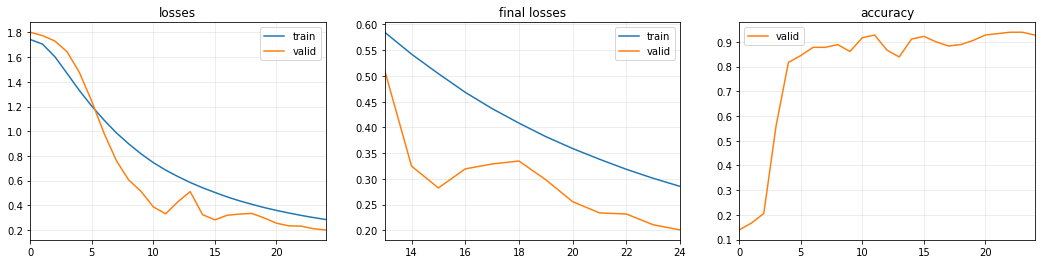

2021-12-03 17:06:43,495 - DataFactory - INFO - ...End network training
2021-12-03 17:06:43,496 - DataFactory - INFO - Start network training of: inception_time...


epoch,train_loss,valid_loss,accuracy,time
0,1.819265,1.788264,0.166667,00:01
1,1.718678,1.787407,0.172222,00:01
2,1.561547,1.778834,0.183333,00:01
3,1.383343,1.759135,0.311111,00:01
4,1.226627,1.719216,0.383333,00:01
5,1.100171,1.641400,0.605556,00:01
6,0.995813,1.517043,0.716667,00:01
7,0.906690,1.375064,0.700000,00:01
8,0.833617,1.218875,0.761111,00:01
9,0.767324,1.032383,0.855556,00:01


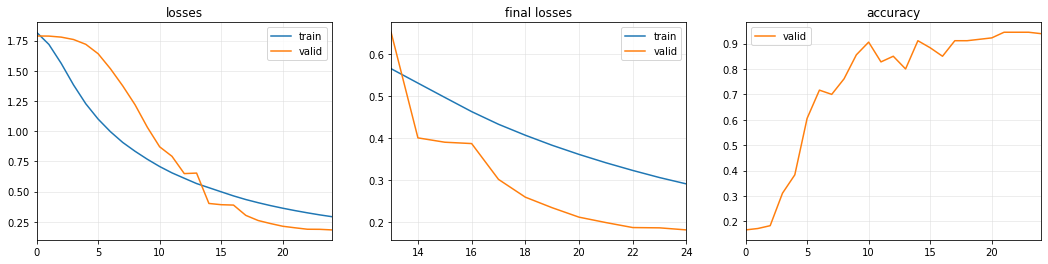

2021-12-03 17:07:17,561 - DataFactory - INFO - ...End network training
2021-12-03 17:07:17,562 - DataFactory - INFO - Start network training of: tst...


epoch,train_loss,valid_loss,accuracy,time
0,1.841980,1.783655,0.238889,00:01
1,1.753006,1.646217,0.505556,00:01
2,1.604781,1.391845,0.627778,00:01
3,1.419660,1.082525,0.638889,00:01
4,1.235992,0.818631,0.683333,00:01
5,1.087225,0.652373,0.694444,00:01
6,0.963004,0.539023,0.727778,00:01
7,0.861519,0.465324,0.761111,00:01
8,0.774972,0.386945,0.794444,00:01
9,0.706281,0.478936,0.783333,00:01


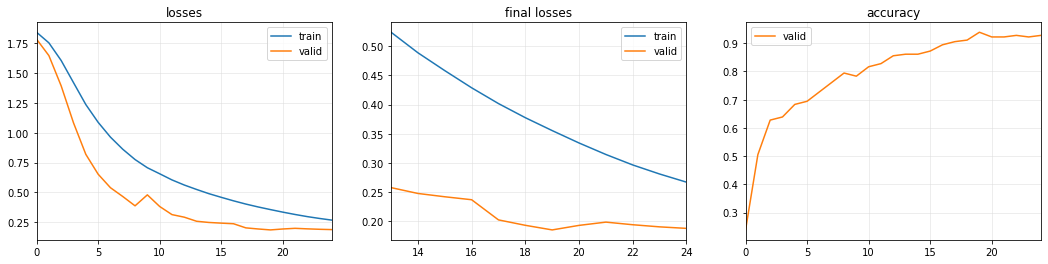

2021-12-03 17:07:50,774 - DataFactory - INFO - ...End network training
2021-12-03 17:07:50,783 - DataFactory - INFO - Start network training of: lstm...


epoch,train_loss,valid_loss,accuracy,time
0,1.387970,1.384896,0.300000,00:02
1,1.388219,1.384380,0.300000,00:02
2,1.387734,1.383188,0.300000,00:02
3,1.387153,1.381209,0.300000,00:02
4,1.386613,1.378461,0.300000,00:02
5,1.385690,1.375028,0.300000,00:01
6,1.384482,1.371124,0.300000,00:02
7,1.382884,1.366992,0.300000,00:03
8,1.380955,1.362714,0.300000,00:03
9,1.378744,1.358353,0.400000,00:03


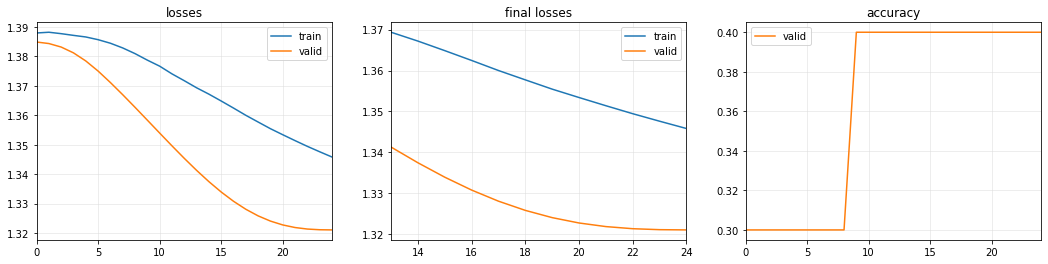

2021-12-03 17:08:52,997 - DataFactory - INFO - ...End network training
2021-12-03 17:08:52,997 - DataFactory - INFO - Start network training of: res_net...


epoch,train_loss,valid_loss,accuracy,time
0,1.391548,1.360237,0.400000,00:00
1,1.382385,1.362350,0.400000,00:00
2,1.368331,1.361434,0.400000,00:00
3,1.352272,1.358836,0.400000,00:00
4,1.338210,1.353665,0.400000,00:00
5,1.328177,1.349081,0.400000,00:00
6,1.321042,1.347407,0.400000,00:00
7,1.315129,1.347415,0.400000,00:00
8,1.310206,1.346474,0.400000,00:00
9,1.305805,1.344113,0.400000,00:00


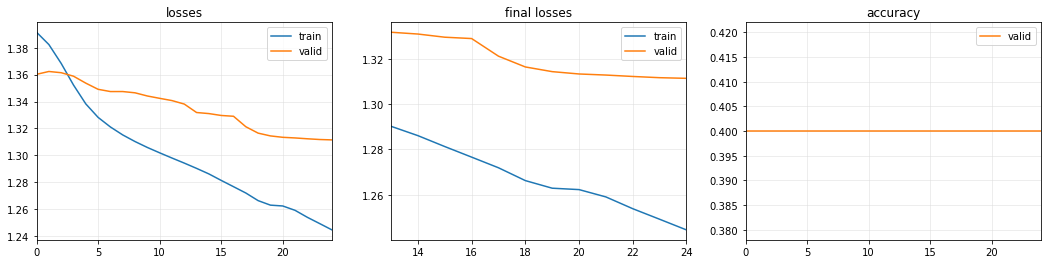

2021-12-03 17:09:18,143 - DataFactory - INFO - ...End network training
2021-12-03 17:09:18,143 - DataFactory - INFO - Start network training of: inception_time...


epoch,train_loss,valid_loss,accuracy,time
0,1.361156,1.405975,0.166667,00:02
1,1.354505,1.405446,0.166667,00:02
2,1.345655,1.403193,0.166667,00:02
3,1.335211,1.399001,0.166667,00:02
4,1.325498,1.393773,0.166667,00:02
5,1.317741,1.388711,0.166667,00:02
6,1.312050,1.383896,0.300000,00:02
7,1.307718,1.379911,0.300000,00:01
8,1.304135,1.376784,0.300000,00:01
9,1.301070,1.373859,0.300000,00:01


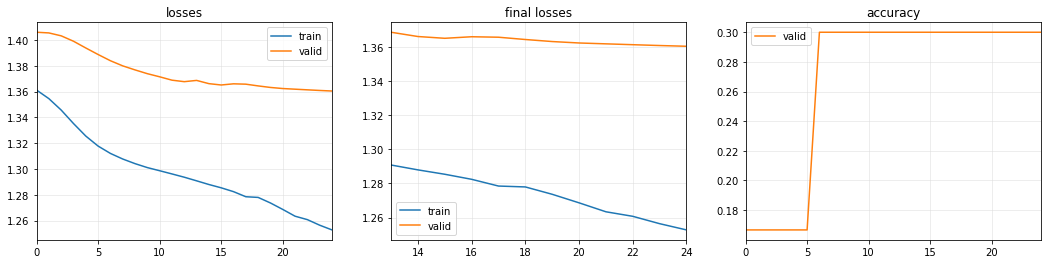

2021-12-03 17:10:08,836 - DataFactory - INFO - ...End network training
2021-12-03 17:10:08,837 - DataFactory - INFO - Start network training of: tst...


epoch,train_loss,valid_loss,accuracy,time
0,1.467986,1.308238,0.400000,00:07
1,1.370500,1.368025,0.400000,00:07
2,1.364683,1.338796,0.400000,00:08
3,1.377160,2.041557,0.133333,00:08
4,1.555261,2.847642,0.400000,00:07
5,1.911998,1.765429,0.400000,00:07
6,2.047573,3.932966,0.300000,00:08
7,2.493541,4.664983,0.133333,00:08
8,3.186760,3.901370,0.300000,00:08
9,3.571316,1.762780,0.400000,00:08


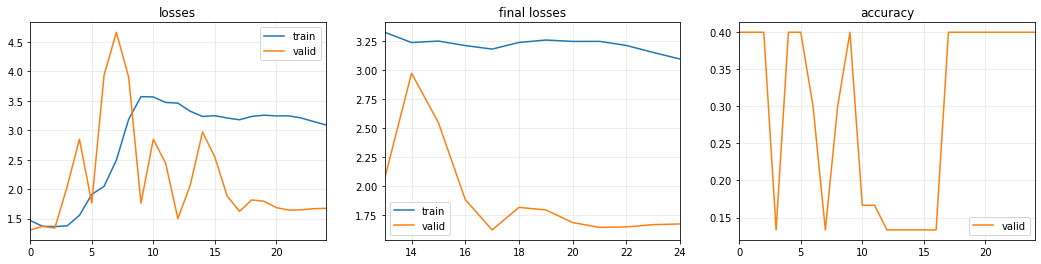

2021-12-03 17:14:10,810 - DataFactory - INFO - ...End network training
2021-12-03 17:14:10,864 - DataFactory - INFO - Start network training of: lstm...


epoch,train_loss,valid_loss,accuracy,time
0,2.635613,2.626143,0.082725,02:00
1,2.610591,2.565210,0.282644,00:05
2,2.440367,2.148407,0.315085,00:05
3,2.266125,2.117581,0.315085,00:05
4,2.159067,1.959292,0.373074,00:05
5,2.004829,1.771024,0.394566,00:05
6,1.863063,1.662911,0.419303,00:09
7,1.747933,1.571064,0.466748,00:06
8,1.657793,1.531836,0.454988,00:05
9,1.573066,1.458843,0.519465,00:04


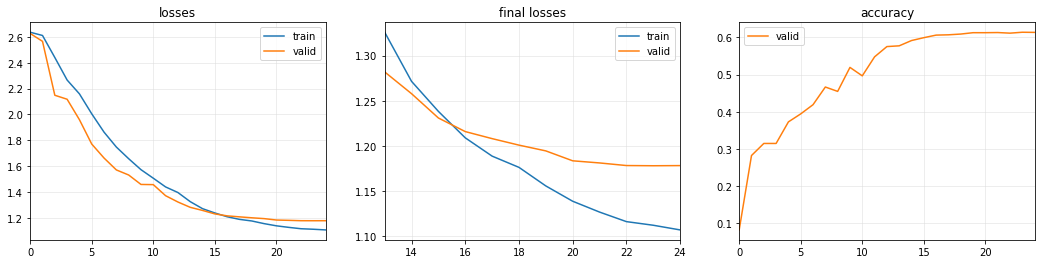

2021-12-03 17:18:22,732 - DataFactory - INFO - ...End network training
2021-12-03 17:18:22,734 - DataFactory - INFO - Start network training of: res_net...


epoch,train_loss,valid_loss,accuracy,time
0,2.335424,2.103280,0.412409,00:09
1,1.956457,1.513301,0.579481,00:08
2,1.571573,1.180159,0.640308,00:08
3,1.303350,1.099166,0.664234,00:08
4,1.121986,1.040807,0.656529,00:09
5,0.998760,1.297137,0.642741,00:08
6,0.888221,1.043802,0.669100,00:08
7,0.781354,1.528978,0.633820,00:22
8,0.699396,1.074522,0.669911,00:39
9,0.634661,1.124331,0.654501,00:08


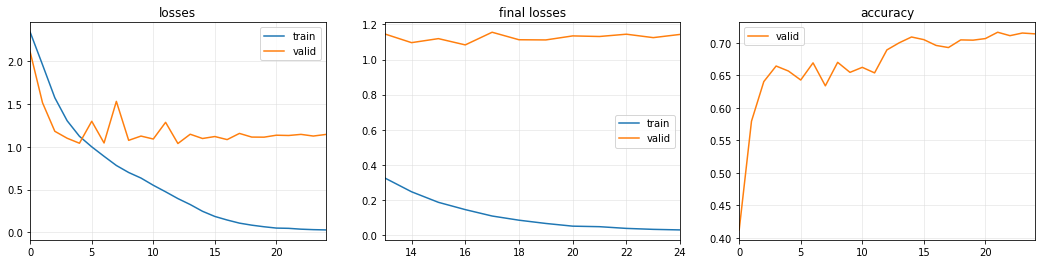

2021-12-03 17:23:28,485 - DataFactory - INFO - ...End network training
2021-12-03 17:23:28,486 - DataFactory - INFO - Start network training of: inception_time...


epoch,train_loss,valid_loss,accuracy,time
0,2.347328,2.232863,0.428224,00:13
1,1.907105,1.398979,0.605028,00:12
2,1.529143,1.291514,0.613139,00:13
3,1.293080,1.124682,0.650041,00:14
4,1.138592,1.291277,0.607056,00:15
5,1.025694,1.287907,0.557583,00:14
6,0.944860,1.239199,0.633820,00:13
7,0.855052,1.082414,0.659367,00:14
8,0.776392,1.226558,0.627332,00:13
9,0.707514,1.080417,0.680049,00:14


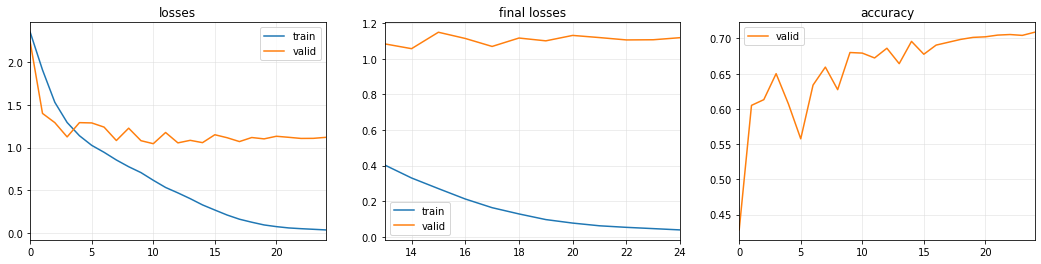

2021-12-03 17:29:33,257 - DataFactory - INFO - ...End network training
2021-12-03 17:29:33,258 - DataFactory - INFO - Start network training of: tst...


epoch,train_loss,valid_loss,accuracy,time
0,2.331568,2.056661,0.337388,00:14
1,1.996878,1.700793,0.463098,00:13
2,1.653646,1.360591,0.548256,00:13
3,1.340489,1.238203,0.581103,00:14
4,1.128584,1.127371,0.616383,00:14
5,0.966034,1.228018,0.600568,00:13
6,0.849947,1.191850,0.618816,00:13
7,0.718145,1.207959,0.626926,00:14
8,0.605379,1.255575,0.596513,00:14
9,0.519751,1.261195,0.613950,00:14


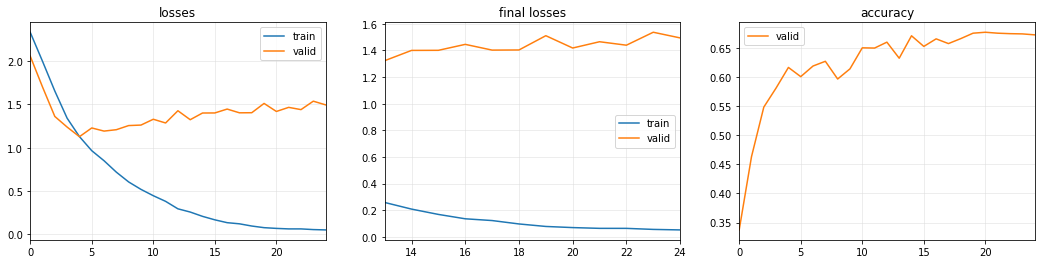

2021-12-03 17:35:26,737 - DataFactory - INFO - ...End network training


In [6]:
results = compare_networks(['lstm', 'res_net', 'inception_time', 'tst'])

Here we can also see how important it is to select the right model. This table shows the end accuracy for each model on different datasets:

In [7]:
results

,Models,NATOPS Dataset,OliveOil Dataset,LSST Dataset
0,LSTM,0.394444,0.4,0.613544
1,ResNet,0.927778,0.4,0.713706
2,InceptionTime,0.938889,0.3,0.708840
3,TST,0.927778,0.4,0.672344


In [8]:
datx = [results['Models'].tolist()]
daty = [results['NATOPS Dataset'].tolist(), results['OliveOil Dataset'].tolist(), results['LSST Dataset'].tolist()]

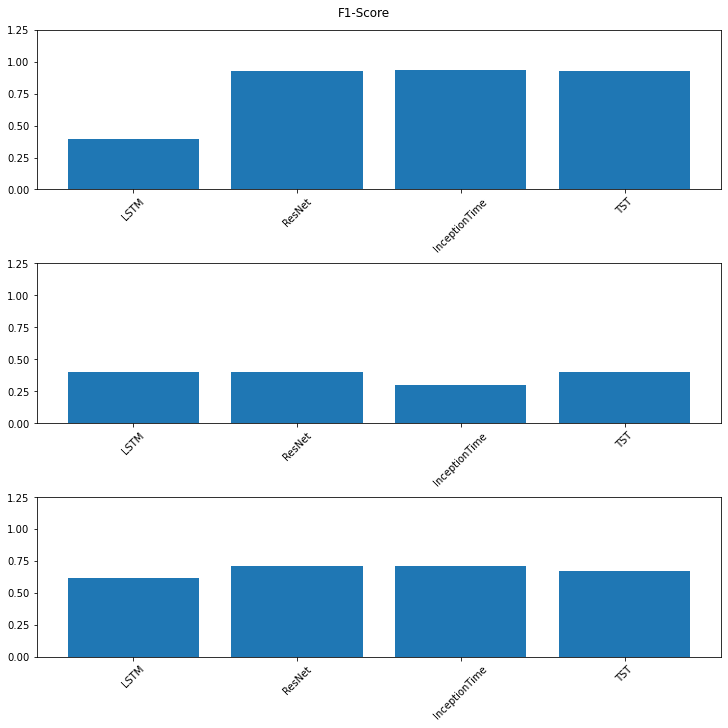

<Figure size 432x288 with 0 Axes>

In [9]:
datafactory.plot(datx, daty, ptype='bar', title='F1-Score')